In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyuvdata import UVData

The idea is that we are working from an existing data file, but we want a new one with controlled LST range.

In [3]:
uvd_raw = UVData()

In [4]:
uvd_raw.read('/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/Simulation/zen.2457755.69492.uvCP.uvh5')

In [5]:
# We'll do this differently, but for now just want to pick LSTs that lie within the range of the data file

In [6]:
uvd_raw.Ntimes

61

In [7]:
def jd_at_lst(uvdata, lst0):
    """ Given a UVData object, find the JD corresponding to the requested LST """
    jd = np.unique(uvdata.time_array)
    lst = np.unique(uvdata.lst_array)
    
    return np.interp(lst0, lst, jd)

In [8]:
lsts = np.unique(uvd_raw.lst_array)
jds = np.unique(uvd_raw.time_array)

In [9]:
pad = 30/3600.*2.*np.pi/24.

In [10]:
lst_min = lsts.min()+pad
lst_max = lsts.max()-pad

In [11]:
lst_where = np.logical_and(lsts < lst_max, lsts > lst_min)

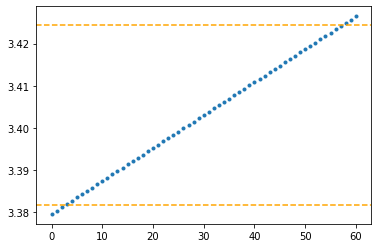

In [12]:
plt.plot(lsts,'.')
plt.axhline(lst_min,linestyle='--',color='orange')
plt.axhline(lst_max,linestyle='--',color='orange')

In [13]:
Ntimes = 60 # Picked by fiat; need a plan

In [14]:
""" You can set the LSTs from the time set_lsts_from_time_array, but here the whole point is to fix the LST, and then
get the corresponding JD.  I hope linear interpolation is sufficiently accurate. """
lsts_new = np.linspace(lst_min, lst_max, Ntimes)
jds_new = jd_at_lst(uvd_raw, lsts_new) 

In [15]:
from hera_sim import io

HealVis failed to import.
PRISim failed to import.
VisGPU failed to import.

In the next major release, all HERA-specific variables will be removed from the codebase. The following variables will need to be accessed through new class-like structures to be introduced in the next major release: 

noise.HERA_Tsky_mdl
noise.HERA_BEAM_POLY
sigchain.HERA_NRAO_BANDPASS
rfi.HERA_RFI_STATIONS

Additionally, the next major release will involve modifications to the package's API, which move toward a regularization of the way in which hera_sim methods are interfaced with; in particular, changes will be made such that the Simulator class is the most intuitive way of interfacing with the hera_sim package features.


In [16]:
ants = uvd_raw.get_ENU_antpos()
ants_dict = {}
for i,a in enumerate(ants[1]):
    ants_dict[a] = ants[0][i]

In [17]:
ants_dict

{9: array([-1.46000000e+01,  7.16130586e-09, -3.44503370e-09]),
 10: array([ 2.19000000e+01,  1.26439709e+01, -3.03342418e-09]),
 20: array([-1.23509992e-10,  7.29162745e-09, -3.22573585e-09]),
 22: array([-7.30000000e+00,  1.26439709e+01, -2.94611446e-09]),
 31: array([ 7.30000000e+00, -1.26439709e+01, -2.68695466e-09]),
 43: array([ 2.92000000e+01,  7.72609052e-09, -2.49464194e-09]),
 53: array([-7.30000000e+00, -1.26439709e+01, -3.05250136e-09]),
 64: array([-2.19000000e+01, -1.26439709e+01, -2.67276867e-09]),
 65: array([ 2.19000000e+01, -1.26439709e+01, -3.06668557e-09]),
 72: array([-1.46000000e+01,  2.52879418e+01, -3.53277052e-09]),
 80: array([-1.46000000e+01, -2.52879418e+01, -3.01467651e-09]),
 81: array([ 7.30000000e+00,  1.26439709e+01, -2.58056776e-09]),
 88: array([-2.92000000e+01,  7.82985996e-09, -2.32002428e-09]),
 89: array([ 1.46000000e+01,  7.50885896e-09, -2.86018953e-09]),
 96: array([ 1.46000000e+01, -2.52879418e+01, -1.53830371e-09]),
 97: array([ 1.46000000e+0

In [18]:
uvd_hera_sim = io.empty_uvdata(nfreq=uvd_raw.Nfreqs, ntimes=Ntimes, ants=ants_dict)

In [19]:
print(uvd_raw.freq_array.shape)
print(uvd_hera_sim.freq_array.shape)

(1, 1024)
(1, 1024)


In [20]:
print(uvd_hera_sim.channel_width, uvd_raw.channel_width)

97656.25 97751.71065492928


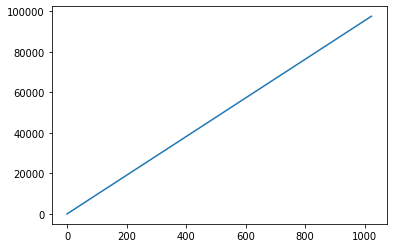

In [22]:
# It's going to be hard to set everything properly this way ...
plt.plot(uvd_raw.freq_array.squeeze() - uvd_hera_sim.freq_array.squeeze())

In [23]:
# OK, this is going to be painful

In [49]:
uvd_new = UVData()

In [88]:
# Let's hope the documentation is good

In [48]:
# for some dumb reason, the attributes are returned with leading underscore
attributes = list(uvd_new.__dict__.keys())
print(attributes)
for i,attribute in enumerate(attributes):
    if attribute[0] == '_':
        attributes[i] = attribute[1:]
print()
print(attributes)

['_Ntimes', '_Nbls', '_Nblts', '_Nfreqs', '_Npols', '_data_array', '_vis_units', '_nsample_array', '_flag_array', '_Nspws', '_spw_array', '_uvw_array', '_time_array', '_lst_array', '_ant_1_array', '_ant_2_array', '_baseline_array', '_freq_array', '_polarization_array', '_integration_time', '_channel_width', '_object_name', '_telescope_name', '_instrument', '_telescope_location', '_history', '_phase_type', '_phase_center_epoch', '_phase_center_ra', '_phase_center_dec', '_phase_center_frame', '_Nants_data', '_Nants_telescope', '_antenna_names', '_antenna_numbers', '_antenna_positions', '_x_orientation', '_blt_order', '_extra_keywords', '_antenna_diameters', '_gst0', '_rdate', '_earth_omega', '_dut1', '_timesys', '_uvplane_reference_time', '_eq_coeffs', '_eq_coeffs_convention', 'pyuvdata_version_str']

['Ntimes', 'Nbls', 'Nblts', 'Nfreqs', 'Npols', 'data_array', 'vis_units', 'nsample_array', 'flag_array', 'Nspws', 'spw_array', 'uvw_array', 'time_array', 'lst_array', 'ant_1_array', 'ant_2_

In [50]:
# Just assign all the original attributes to the new thing
for attribute in attributes:
    setattr(uvd_new, attribute, getattr(uvd_raw, attribute))

In [52]:
uvd_raw == uvd_new

True

In [63]:
uvd_raw.flag_array.shape

(11590, 1, 1024, 4)

In [76]:
uvd_raw.data_array.shape

(11590, 1, 1024, 4)

In [72]:
Nblts = Ntimes * uvd_raw.Nbls
Nspws = uvd_raw.Nspws
Nfreqs = uvd_raw.Nfreqs
Npols = uvd_raw.Npols

In [78]:
data_array_new = np.zeros([Nblts, Nspws, Nfreqs, Npols])
flag_array_new = np.zeros([Nblts, Nspws, Nfreqs, Npols])
uvw_array_new = np.zeros([Nblts, 3])
time_array_new = np.zeros([Nblts])
lst_array_new = np.zeros([Nblts])
integration_time_new = np.zeros([Nblts])

In [79]:
# What do we need to change?
to_change = {'Ntimes' : Ntimes,
             'Nblts' : Nblts,
             'data_array' : data_array_new,
             'flag_array' : flag_array_new, # ... hoo boy
             'uvw_array' : uvw_array_new, #... need to check if we're drift scanning
             'time_array' : time_array_new, 
             'lst_array' : lst_array_new, 
             'integration_time' : integration_time_new}

In [81]:
uvd_new = UVData()
for attribute in attributes:
    if attribute in to_change.keys():
        print('Changing '+attribute)
        setattr(uvd_new, attribute, to_change[attribute])
    else:
        setattr(uvd_new, attribute, getattr(uvd_raw, attribute))

Changing Ntimes
Changing Nblts
Changing data_array
Changing flag_array
Changing uvw_array
Changing time_array
Changing lst_array
Changing integration_time


In [82]:
uvd_new.lst_array.shape

(11400,)

In [83]:
uvd_new.Nants_data == uvd_raw.Nants_data

True